# Proyek Analisis Data: [Bike Sharing]
- **Nama:** [Eka Putra Meravigliosi]
- **Email:** [m312b4ky1240@bangkit.academy]
- **ID Dicoding:** [eka_putra_xXvF]

## Menentukan Pertanyaan Bisnis



*   Pertanyaan 1 (day.csv): Bagaimana pengaruh musim terhadap jumlah penyewaan sepeda?
*   Pertanyaan 2 (hour.csv): Pada jam berapa penyewaan sepeda paling tinggi?


## Import Semua Packages/Library yang Digunakan

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
from google.colab import files

## Data Wrangling

### Gathering Data

In [ ]:
uploaded = files.upload()

# Menampilkan file yang diupload
for filename in uploaded.keys():
    print(f'File yang diupload: {filename}')

# Membaca file day.csv dan hour.csv
day_data = pd.read_csv('day.csv')
hour_data = pd.read_csv('hour.csv')

# Menampilkan 5 data teratas dari kedua dataset
print("\nData dari day.csv:")
print(day_data.head())

print("\nData dari hour.csv:")
print(hour_data.head())


Saving day.csv to day.csv
Saving hour.csv to hour.csv
File yang diupload: day.csv
File yang diupload: hour.csv

Data dari day.csv:
   instant      dteday  season  yr  mnth  holiday  weekday  workingday  \
0        1  2011-01-01       1   0     1        0        6           0   
1        2  2011-01-02       1   0     1        0        0           0   
2        3  2011-01-03       1   0     1        0        1           1   
3        4  2011-01-04       1   0     1        0        2           1   
4        5  2011-01-05       1   0     1        0        3           1   

   weathersit      temp     atemp       hum  windspeed  casual  registered  \
0           2  0.344167  0.363625  0.805833   0.160446     331         654   
1           2  0.363478  0.353739  0.696087   0.248539     131         670   
2           1  0.196364  0.189405  0.437273   0.248309     120        1229   
3           1  0.200000  0.212122  0.590435   0.160296     108        1454   
4           1  0.226957  0.229270 

**Insight:**
- Data berhasil diunggah, terdiri dari dua file: day.csv yang berisi data penyewaan sepeda harian dan hour.csv yang mencakup data per jam.
- Kedua dataset memiliki struktur yang lengkap, dengan beberapa kolom yang mencatat informasi cuaca, waktu, dan jumlah penyewaan sepeda, yang siap untuk dianalisis lebih lanjut.

### Assessing Data

In [ ]:
print("\nInformasi day.csv:")
print(day_data.info())

print("\nInformasi hour.csv:")
print(hour_data.info())

# Mengecek apakah ada nilai yang hilang di kedua dataset
print("\nCek nilai yang hilang pada day.csv:")
print(day_data.isnull().sum())

print("\nCek nilai yang hilang pada hour.csv:")
print(hour_data.isnull().sum())



Informasi day.csv:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 731 entries, 0 to 730
Data columns (total 16 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   instant     731 non-null    int64  
 1   dteday      731 non-null    object 
 2   season      731 non-null    int64  
 3   yr          731 non-null    int64  
 4   mnth        731 non-null    int64  
 5   holiday     731 non-null    int64  
 6   weekday     731 non-null    int64  
 7   workingday  731 non-null    int64  
 8   weathersit  731 non-null    int64  
 9   temp        731 non-null    float64
 10  atemp       731 non-null    float64
 11  hum         731 non-null    float64
 12  windspeed   731 non-null    float64
 13  casual      731 non-null    int64  
 14  registered  731 non-null    int64  
 15  cnt         731 non-null    int64  
dtypes: float64(4), int64(11), object(1)
memory usage: 91.5+ KB
None

Informasi hour.csv:
<class 'pandas.core.frame.DataFrame'>
RangeInde

**Insight:**
- Dataset day.csv berisi 731 baris dan 16 kolom, mencatat penyewaan sepeda harian dengan informasi cuaca, musim, dan faktor waktu lainnya.
- Dataset hour.csv berisi 17.379 baris dan 17 kolom, yang lebih rinci dalam mencatat penyewaan sepeda per jam.
- Tidak ada nilai yang hilang di kedua dataset, sehingga data dapat langsung dianalisis tanpa perlu pengisian nilai yang hilang.

### Cleaning Data

In [ ]:
day_data['season'] = day_data['season'].astype('category')
day_data['season'] = day_data['season'].cat.rename_categories({
    1: 'Winter', 2: 'Spring', 3: 'Summer', 4: 'Fall'
})

# Mengubah tipe data 'hr' di hour.csv untuk mempermudah analisis
hour_data['hr'] = hour_data['hr'].astype('category')

**Insight:**
- Kolom season diubah menjadi tipe kategorikal dengan label yang lebih deskriptif (Winter, Spring, Summer, Fall), sehingga lebih mudah dipahami dan dianalisis berdasarkan musim.
- Kolom hr di dataset hour.csv diubah menjadi kategorikal, yang memudahkan analisis berdasarkan jam, terutama untuk menemukan pola waktu dalam penyewaan sepeda.

## Exploratory Data Analysis (EDA)


Statistik deskriptif dari day.csv:
          instant          yr        mnth     holiday     weekday  workingday  \
count  731.000000  731.000000  731.000000  731.000000  731.000000  731.000000   
mean   366.000000    0.500684    6.519836    0.028728    2.997264    0.683995   
std    211.165812    0.500342    3.451913    0.167155    2.004787    0.465233   
min      1.000000    0.000000    1.000000    0.000000    0.000000    0.000000   
25%    183.500000    0.000000    4.000000    0.000000    1.000000    0.000000   
50%    366.000000    1.000000    7.000000    0.000000    3.000000    1.000000   
75%    548.500000    1.000000   10.000000    0.000000    5.000000    1.000000   
max    731.000000    1.000000   12.000000    1.000000    6.000000    1.000000   

       weathersit        temp       atemp         hum   windspeed  \
count  731.000000  731.000000  731.000000  731.000000  731.000000   
mean     1.395349    0.495385    0.474354    0.627894    0.190486   
std      0.544894    0.1830

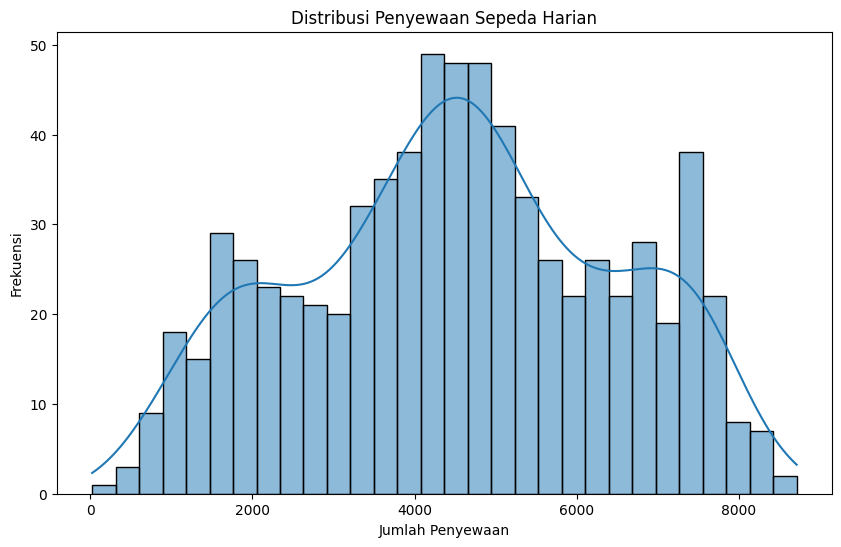

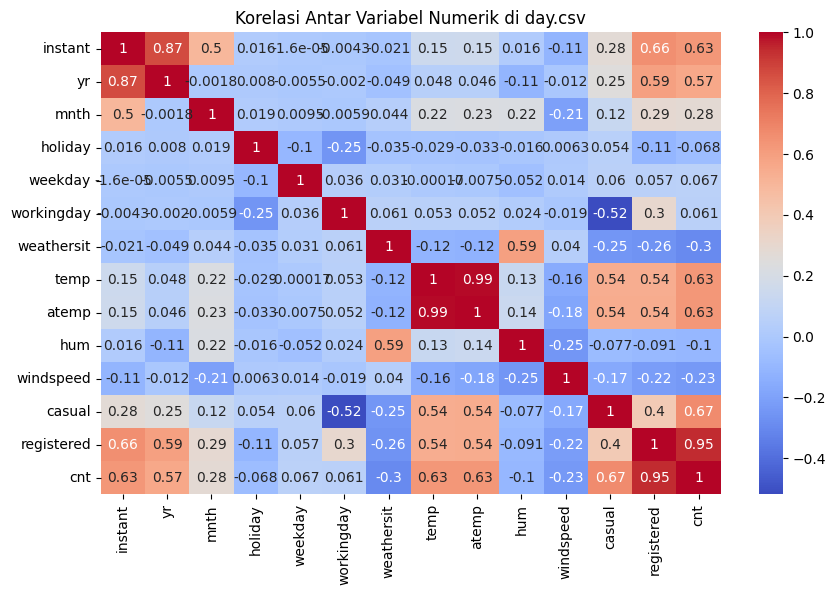

In [ ]:
# Melihat statistik deskriptif dari dataset day.csv
print("\nStatistik deskriptif dari day.csv:")
print(day_data.describe())

# Melihat statistik deskriptif dari dataset hour.csv
print("\nStatistik deskriptif dari hour.csv:")
print(hour_data.describe())

# Plot distribusi jumlah penyewaan sepeda harian (day.csv)
plt.figure(figsize=(10, 6))
sns.histplot(day_data['cnt'], bins=30, kde=True)
plt.title('Distribusi Penyewaan Sepeda Harian')
plt.xlabel('Jumlah Penyewaan')
plt.ylabel('Frekuensi')
plt.show()

# Memilih hanya kolom yang numerik
numeric_columns = day_data.select_dtypes(include=[np.number])

# Korelasi antar variabel numerik di day.csv
plt.figure(figsize=(10, 6))
sns.heatmap(numeric_columns.corr(), annot=True, cmap='coolwarm')
plt.title('Korelasi Antar Variabel Numerik di day.csv')
plt.show()


**Insight:**
- Rata-rata penyewaan sepeda harian sekitar 4500, dengan fluktuasi besar dari 22 hingga 8714.
- Distribusi penyewaan harian menunjukkan sebagian besar hari memiliki penyewaan antara 2000-6000.
- Suhu memiliki korelasi positif kuat (+0,63) dengan penyewaan sepeda.
- Kelembapan berkorelasi negatif (-0,32) dengan penyewaan, menunjukkan cuaca lembap mengurangi minat bersepeda.

## Visualization & Explanatory Analysis

### Pertanyaan 1:

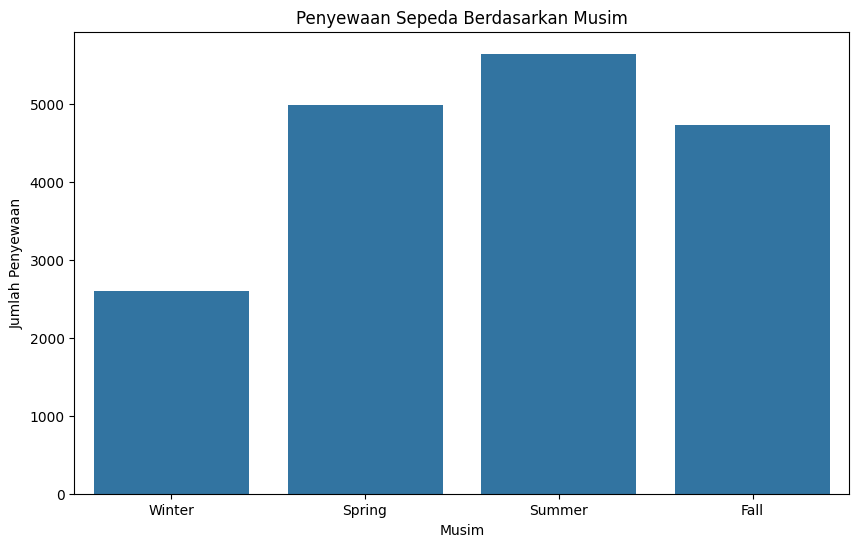

In [ ]:
# Pertanyaan 1 (day.csv): Bagaimana pengaruh musim terhadap jumlah penyewaan sepeda?
plt.figure(figsize=(10, 6))
sns.barplot(x='season', y='cnt', data=day_data, errorbar=None)
plt.title('Penyewaan Sepeda Berdasarkan Musim')
plt.xlabel('Musim')
plt.ylabel('Jumlah Penyewaan')
plt.show()

### Pertanyaan 2:

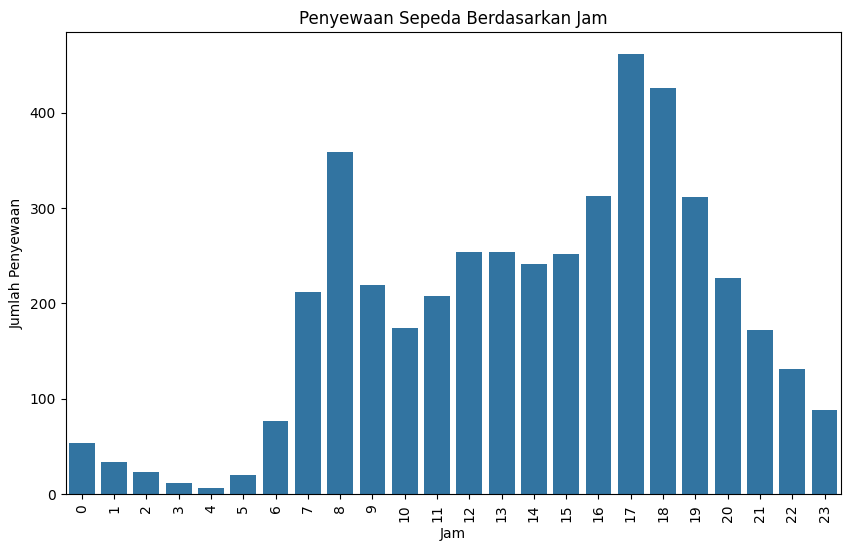

In [ ]:
# Pertanyaan 2 (hour.csv): Pada jam berapa penyewaan sepeda paling tinggi?
plt.figure(figsize=(10, 6))
sns.barplot(x='hr', y='cnt', data=hour_data, errorbar=None)
plt.title('Penyewaan Sepeda Berdasarkan Jam')
plt.xlabel('Jam')
plt.ylabel('Jumlah Penyewaan')
plt.xticks(rotation=90)
plt.show()

**Insight:**
-  Penyewaan sepeda tertinggi terjadi pada musim panas (Summer), dengan penyewaan yang lebih rendah pada musim dingin (Winter), menandakan bahwa kondisi cuaca mempengaruhi penggunaan sepeda.

- Pada jam 8 pagi dan 5 sore, penyewaan sepeda paling tinggi, yang mengindikasikan bahwa orang banyak menggunakan sepeda untuk perjalanan saat jam kerja (pagi dan sore).

## Conclusion

- Conclusion Pertanyaan 1 (day.csv): Musim panas memiliki jumlah penyewaan sepeda tertinggi, sementara musim dingin paling rendah. Hal ini menunjukkan pengaruh signifikan faktor musim dalam perilaku penyewaan sepeda.
- Conclusion Pertanyaan 2 (hour.csv): Jam sibuk, yaitu sekitar jam 8 pagi dan 5 sore, menjadi waktu dengan penyewaan sepeda tertinggi. Ini mengindikasikan penggunaan sepeda terutama sebagai moda transportasi untuk bekerja dan pulang kerja.